# Import necessary depencencies

In [2]:
import pandas as pd
import numpy as np
# import text_normalizer as tn
import model_evaluation_utils as meu
import importlib

np.set_printoptions(precision=2, linewidth=80)

# Load and normalize data

In [3]:
dataset = pd.read_csv('../../data/movie_reviews_cleaned.csv')

# take a peek at the data
print(dataset.head())
reviews = np.array(dataset['review'])
sentiments = np.array(dataset['sentiment'])

# build train and test datasets
train_reviews = reviews[:5000]
train_sentiments = sentiments[:5000]
test_reviews = reviews[5000:7000]
test_sentiments = sentiments[5000:7000]

# normalize datasets
# norm_train_reviews = tn.normalize_corpus(train_reviews)
# norm_test_reviews = tn.normalize_corpus(test_reviews)

norm_train_reviews = train_reviews
norm_test_reviews = test_reviews

                                              review sentiment
0  not bother think would see movie great supspen...  negative
1  careful one get mitt change way look kung fu f...  positive
2  chili palmer tired movie know want success mus...  negative
3  follow little know 1998 british film make budg...  positive
4  dark angel cross huxley brave new world percys...  positive


# Traditional Supervised Machine Learning Models

## Feature Engineering

In [4]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# build BOW features on train reviews
cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0, ngram_range=(1,2))
cv_train_features = cv.fit_transform(norm_train_reviews)
# build TFIDF features on train reviews
tv = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0, ngram_range=(1,2),
                     sublinear_tf=True)
tv_train_features = tv.fit_transform(norm_train_reviews)

In [5]:
# transform test reviews into features
cv_test_features = cv.transform(norm_test_reviews)
tv_test_features = tv.transform(norm_test_reviews)

In [6]:
print('BOW model:> Train features shape:', tv_train_features.shape, ' Test features shape:', cv_test_features.shape)
print('TFIDF model:> Train features shape:', tv_train_features.shape, ' Test features shape:', tv_test_features.shape)

BOW model:> Train features shape: (5000, 434563)  Test features shape: (2000, 434563)
TFIDF model:> Train features shape: (5000, 434563)  Test features shape: (2000, 434563)


## Model Training, Prediction and Performance Evaluation

In [7]:
from sklearn.linear_model import SGDClassifier, LogisticRegression

lr = LogisticRegression(penalty='l2', max_iter=100, C=1)
svm = SGDClassifier(loss='hinge', max_iter=100)

In [8]:
# Logistic Regression model on BOW features

importlib.reload(meu)

lr_bow_predictions = meu.train_predict_model(classifier=lr, 
                                             train_features=cv_train_features, train_labels=train_sentiments,
                                             test_features=cv_test_features, test_labels=test_sentiments)
meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=lr_bow_predictions,
                                      classes=['positive', 'negative'])

/Users/canxiuzhang/anaconda3/envs/nlp_3_9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Performance metrics:
------------------------------
Accuracy: 0.8605
Precision: 0.8606
Recall: 0.8605
F1 Score: 0.8605

Model Classification report:
------------------------------
              precision    recall  f1-score   support

    positive       0.85      0.86      0.86       981
    negative       0.87      0.86      0.86      1019

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000


Prediction Confusion Matrix:
------------------------------
                 Predicted:         
                   positive negative
Actual: positive        846      135
        negative        144      875


In [9]:
# Logistic Regression model on TF-IDF features
lr_tfidf_predictions = meu.train_predict_model(classifier=lr, 
                                               train_features=tv_train_features, train_labels=train_sentiments,
                                               test_features=tv_test_features, test_labels=test_sentiments)
meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=lr_tfidf_predictions,
                                      classes=['positive', 'negative'])

Model Performance metrics:
------------------------------
Accuracy: 0.866
Precision: 0.8661
Recall: 0.866
F1 Score: 0.866

Model Classification report:
------------------------------
              precision    recall  f1-score   support

    positive       0.87      0.85      0.86       981
    negative       0.86      0.88      0.87      1019

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000


Prediction Confusion Matrix:
------------------------------
                 Predicted:         
                   positive negative
Actual: positive        838      143
        negative        125      894


In [10]:
svm_bow_predictions = meu.train_predict_model(classifier=svm, 
                                             train_features=cv_train_features, train_labels=train_sentiments,
                                             test_features=cv_test_features, test_labels=test_sentiments)
meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=svm_bow_predictions,
                                      classes=['positive', 'negative'])

Model Performance metrics:
------------------------------
Accuracy: 0.8405
Precision: 0.8405
Recall: 0.8405
F1 Score: 0.8405

Model Classification report:
------------------------------
              precision    recall  f1-score   support

    positive       0.84      0.84      0.84       981
    negative       0.84      0.84      0.84      1019

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000


Prediction Confusion Matrix:
------------------------------
                 Predicted:         
                   positive negative
Actual: positive        820      161
        negative        158      861


In [11]:
svm_tfidf_predictions = meu.train_predict_model(classifier=svm, 
                                                train_features=tv_train_features, train_labels=train_sentiments,
                                                test_features=tv_test_features, test_labels=test_sentiments)
meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=svm_tfidf_predictions,
                                      classes=['positive', 'negative'])

Model Performance metrics:
------------------------------
Accuracy: 0.8815
Precision: 0.8815
Recall: 0.8815
F1 Score: 0.8815

Model Classification report:
------------------------------
              precision    recall  f1-score   support

    positive       0.88      0.87      0.88       981
    negative       0.88      0.89      0.88      1019

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000


Prediction Confusion Matrix:
------------------------------
                 Predicted:         
                   positive negative
Actual: positive        856      125
        negative        112      907


# Newer Supervised Deep Learning Models

In [12]:
import gensim
import keras
from keras.models import Sequential
from keras.layers import Dropout, Activation, Dense
from sklearn.preprocessing import LabelEncoder

import spacy
import nltk
from nltk.tokenize.toktok import ToktokTokenizer

tokenizer = ToktokTokenizer()

nlp = spacy.load('en_core_web_sm')

## Prediction class label encoding

In [13]:
le = LabelEncoder()
num_classes=2 
# tokenize train reviews & encode train labels
tokenized_train = [tokenizer.tokenize(text)
                   for text in norm_train_reviews]
y_tr = le.fit_transform(train_sentiments)
y_train = keras.utils.to_categorical(y_tr, num_classes)
# tokenize test reviews & encode test labels
tokenized_test = [tokenizer.tokenize(text)
                   for text in norm_test_reviews]
y_ts = le.fit_transform(test_sentiments)
y_test = keras.utils.to_categorical(y_ts, num_classes)

In [14]:
# print class label encoding map and encoded labels
print('Sentiment class label map:', dict(zip(le.classes_, le.transform(le.classes_))))
print('Sample test label transformation:\n'+'-'*35,
      '\nActual Labels:', test_sentiments[:3], '\nEncoded Labels:', y_ts[:3], 
      '\nOne hot encoded Labels:\n', y_test[:3])

Sentiment class label map: {'negative': 0, 'positive': 1}
Sample test label transformation:
----------------------------------- 
Actual Labels: ['negative' 'negative' 'negative'] 
Encoded Labels: [0 0 0] 
One hot encoded Labels:
 [[1. 0.]
 [1. 0.]
 [1. 0.]]


## Feature Engineering with word embeddings

In [15]:
# build word2vec model
w2v_num_features = 500
w2v_model = gensim.models.Word2Vec(tokenized_train, vector_size=w2v_num_features, window=150,
                                   min_count=10, sample=1e-3)    

In [16]:
def averaged_word2vec_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index_to_key)
    
    
    def average_word_vectors(words, model, vocabulary, num_features):
        feature_vector = np.zeros((num_features,), dtype="float64")
        nwords = 0.
        
        for word in words:
            if word in vocabulary: 
                nwords = nwords + 1.
                feature_vector = np.add(feature_vector, model.wv[word])
        if nwords:
            feature_vector = np.divide(feature_vector, nwords)

        return feature_vector

    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)

In [17]:
# generate averaged word vector features from word2vec model
avg_wv_train_features = averaged_word2vec_vectorizer(corpus=tokenized_train, model=w2v_model,
                                                     num_features=500)
avg_wv_test_features = averaged_word2vec_vectorizer(corpus=tokenized_test, model=w2v_model,
                                                    num_features=500)

In [18]:
# feature engineering with GloVe model
train_nlp = [nlp(item) for item in norm_train_reviews]
train_glove_features = np.array([item.vector for item in train_nlp])

test_nlp = [nlp(item) for item in norm_test_reviews]
test_glove_features = np.array([item.vector for item in test_nlp])

In [19]:
print('Word2Vec model:> Train features shape:', avg_wv_train_features.shape, ' Test features shape:', avg_wv_test_features.shape)
print('GloVe model:> Train features shape:', train_glove_features.shape, ' Test features shape:', test_glove_features.shape)

Word2Vec model:> Train features shape: (5000, 500)  Test features shape: (2000, 500)
GloVe model:> Train features shape: (5000, 96)  Test features shape: (2000, 96)


## Modeling with deep neural networks 

### Building Deep neural network architecture

In [20]:
def construct_deepnn_architecture(num_input_features):
    dnn_model = Sequential()
    dnn_model.add(Dense(512, activation='relu', input_shape=(num_input_features,)))
    dnn_model.add(Dropout(0.2))
    dnn_model.add(Dense(512, activation='relu'))
    dnn_model.add(Dropout(0.2))
    dnn_model.add(Dense(512, activation='relu'))
    dnn_model.add(Dropout(0.2))
    dnn_model.add(Dense(2))
    dnn_model.add(Activation('softmax'))

    dnn_model.compile(loss='categorical_crossentropy', optimizer='adam',                 
                      metrics=['accuracy'])
    return dnn_model

In [21]:
w2v_dnn = construct_deepnn_architecture(num_input_features=500)

2023-03-18 14:59:10.128574: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Visualize sample deep architecture

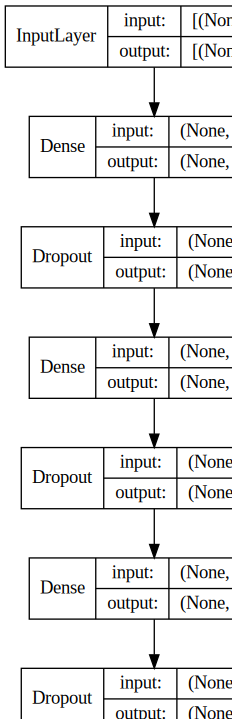

In [41]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(w2v_dnn, show_shapes=True, show_layer_names=False, 
                 rankdir='TB').create(prog='dot', format='svg'))

### Model Training, Prediction and Performance Evaluation

In [23]:
batch_size = 100
w2v_dnn.fit(avg_wv_train_features, y_train, epochs=5, batch_size=batch_size, 
            shuffle=True, validation_split=0.1, verbose=1)

Epoch 1/5
45/45 [==============================] - 3s 27ms/step - loss: 0.5057 - accuracy: 0.7553 - val_loss: 0.4687 - val_accuracy: 0.7720
Epoch 2/5
45/45 [==============================] - 1s 19ms/step - loss: 0.4599 - accuracy: 0.7816 - val_loss: 0.4587 - val_accuracy: 0.7740
Epoch 3/5
45/45 [==============================] - 1s 30ms/step - loss: 0.4508 - accuracy: 0.7862 - val_loss: 0.4510 - val_accuracy: 0.7840
Epoch 4/5
45/45 [==============================] - 2s 49ms/step - loss: 0.4475 - accuracy: 0.7869 - val_loss: 0.4551 - val_accuracy: 0.7880
Epoch 5/5
45/45 [==============================] - 1s 29ms/step - loss: 0.4386 - accuracy: 0.7956 - val_loss: 0.4412 - val_accuracy: 0.7820


In [26]:
y_pred = w2v_dnn.predict(avg_wv_test_features)
y_classes = np.argmax(y_pred, axis=1)
predictions = le.inverse_transform(y_classes) 

63/63 [==============================] - 0s 3ms/step


In [27]:
meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=predictions, 
                                      classes=['positive', 'negative'])  

Model Performance metrics:
------------------------------
Accuracy: 0.793
Precision: 0.8005
Recall: 0.793
F1 Score: 0.7921

Model Classification report:
------------------------------
              precision    recall  f1-score   support

    positive       0.75      0.87      0.80       981
    negative       0.85      0.72      0.78      1019

    accuracy                           0.79      2000
   macro avg       0.80      0.79      0.79      2000
weighted avg       0.80      0.79      0.79      2000


Prediction Confusion Matrix:
------------------------------
                 Predicted:         
                   positive negative
Actual: positive        850      131
        negative        283      736


In [31]:
glove_dnn = construct_deepnn_architecture(num_input_features=96)

In [32]:
batch_size = 100
glove_dnn.fit(train_glove_features, y_train, epochs=5, batch_size=batch_size, 
              shuffle=True, validation_split=0.1, verbose=1)

Epoch 1/5
45/45 [==============================] - 3s 27ms/step - loss: 0.6729 - accuracy: 0.5860 - val_loss: 0.6607 - val_accuracy: 0.5960
Epoch 2/5
45/45 [==============================] - 1s 20ms/step - loss: 0.6494 - accuracy: 0.6167 - val_loss: 0.6488 - val_accuracy: 0.6180
Epoch 3/5
45/45 [==============================] - 1s 14ms/step - loss: 0.6426 - accuracy: 0.6313 - val_loss: 0.6410 - val_accuracy: 0.6420
Epoch 4/5
45/45 [==============================] - 1s 15ms/step - loss: 0.6303 - accuracy: 0.6473 - val_loss: 0.6332 - val_accuracy: 0.6340
Epoch 5/5
45/45 [==============================] - 1s 16ms/step - loss: 0.6178 - accuracy: 0.6649 - val_loss: 0.6385 - val_accuracy: 0.6420


In [35]:
y_pred = glove_dnn.predict(test_glove_features)

y_classes = np.argmax(y_pred, axis=1)
predictions = le.inverse_transform(y_classes)
# predictions = le.inverse_transform(y_pred) 

63/63 [==============================] - 0s 3ms/step


In [36]:
meu.display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=predictions, 
                                      classes=['positive', 'negative'])  

Model Performance metrics:
------------------------------
Accuracy: 0.6475
Precision: 0.6517
Recall: 0.6475
F1 Score: 0.6437

Model Classification report:
------------------------------
              precision    recall  f1-score   support

    positive       0.67      0.54      0.60       981
    negative       0.63      0.75      0.68      1019

    accuracy                           0.65      2000
   macro avg       0.65      0.65      0.64      2000
weighted avg       0.65      0.65      0.64      2000


Prediction Confusion Matrix:
------------------------------
                 Predicted:         
                   positive negative
Actual: positive        534      447
        negative        258      761
